### 1. business understanding 

### 2.Data understanding 

In [1]:
pip install --upgrade jupyterlab-git

Note: you may need to restart the kernel to use updated packages.


#### 2.1 importer les bibliotheques 

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import scipy.cluster.hierarchy as shc #?

#### 2.2 - Load Data

In [43]:
filename = r'C:\Users\HOME\vis\student dropout.csv'
data = pd.read_csv(filename)

#### 2.3 - Explore Data

In [3]:
# Get the shape of the dataset
print("Shape of the dataset:", data.shape)

Shape of the dataset: (649, 34)


In [4]:
# View the first few rows of the dataset
print(data.head()) 

  School Gender  Age Address Family_Size Parental_Status  Mother_Education  \
0     GP      F   18       U         GT3               A                 4   
1     GP      F   17       U         GT3               T                 1   
2     GP      F   15       U         LE3               T                 1   
3     GP      F   15       U         GT3               T                 4   
4     GP      F   16       U         GT3               T                 3   

   Father_Education Mother_Job Father_Job  ... Free_Time Going_Out  \
0                 4    at_home    teacher  ...         3         4   
1                 1    at_home      other  ...         3         3   
2                 1    at_home      other  ...         3         2   
3                 2     health   services  ...         2         2   
4                 3      other      other  ...         3         2   

   Weekend_Alcohol_Consumption  Weekday_Alcohol_Consumption  Health_Status  \
0                            1  

In [5]:
# Get summary statistics of the dataset
print(data.describe())

              Age  Mother_Education  Father_Education  Travel_Time  \
count  649.000000        649.000000        649.000000   649.000000   
mean    16.744222          2.514638          2.306626     1.568567   
std      1.218138          1.134552          1.099931     0.748660   
min     15.000000          0.000000          0.000000     1.000000   
25%     16.000000          2.000000          1.000000     1.000000   
50%     17.000000          2.000000          2.000000     1.000000   
75%     18.000000          4.000000          3.000000     2.000000   
max     22.000000          4.000000          4.000000     4.000000   

       Study_Time  Number_of_Failures  Family_Relationship   Free_Time  \
count  649.000000          649.000000           649.000000  649.000000   
mean     1.930663            0.221880             3.930663    3.180277   
std      0.829510            0.593235             0.955717    1.051093   
min      1.000000            0.000000             1.000000    1.000000   

In [6]:
# Get information about the dataset, including data types
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 34 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   School                       649 non-null    object
 1   Gender                       649 non-null    object
 2   Age                          649 non-null    int64 
 3   Address                      649 non-null    object
 4   Family_Size                  649 non-null    object
 5   Parental_Status              649 non-null    object
 6   Mother_Education             649 non-null    int64 
 7   Father_Education             649 non-null    int64 
 8   Mother_Job                   649 non-null    object
 9   Father_Job                   649 non-null    object
 10  Reason_for_Choosing_School   649 non-null    object
 11  Guardian                     649 non-null    object
 12  Travel_Time                  649 non-null    int64 
 13  Study_Time                   649 no

In [39]:
print(data['Dropped_Out'].value_counts())

Dropped_Out
False    549
True     100
Name: count, dtype: int64


##### Correlation Matrix

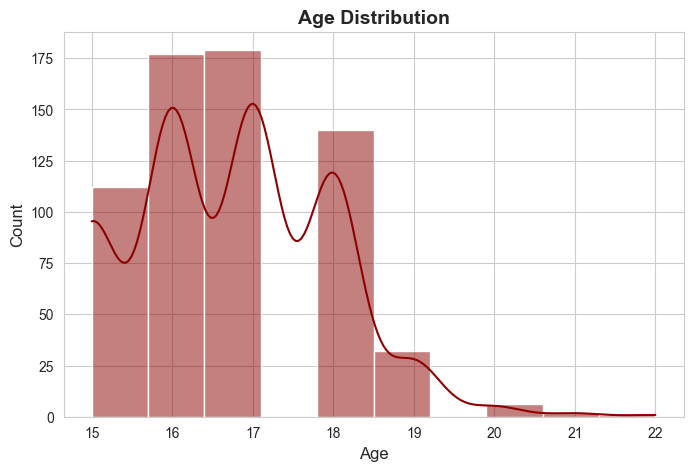

In [25]:
# Set the style and palette
sns.set_style("whitegrid")
sns.set_palette("flare")  # Use a "hot" palette

# Age Distribution
plt.figure(figsize=(8, 5))
sns.histplot(data['Age'], bins=10, kde=True, color='darkred')
plt.title('Age Distribution', fontsize=14, weight='bold')
plt.xlabel('Age', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

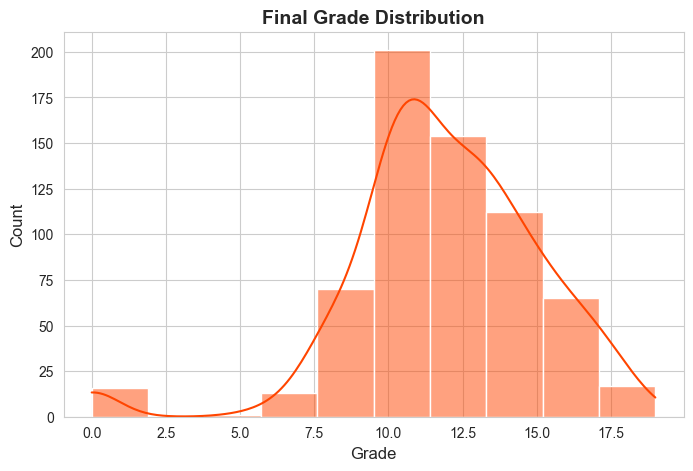

In [26]:
# Final Grade Distribution
plt.figure(figsize=(8, 5))
sns.histplot(data['Final_Grade'], bins=10, kde=True, color='orangered')
plt.title('Final Grade Distribution', fontsize=14, weight='bold')
plt.xlabel('Grade', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

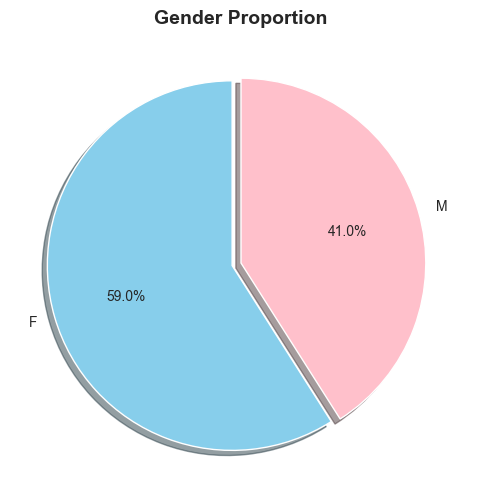

In [27]:
# Gender Proportion
plt.figure(figsize=(6, 6))
data['Gender'].value_counts().plot(
    kind='pie', 
    autopct='%1.1f%%', 
    colors=['skyblue', 'pink'], 
    explode=[0.05, 0],  # Slight separation for effect
    startangle=90,
    shadow=True
)
plt.title('Gender Proportion', fontsize=14, weight='bold')
plt.ylabel('')  # Removes 'y-axis' label
plt.show()

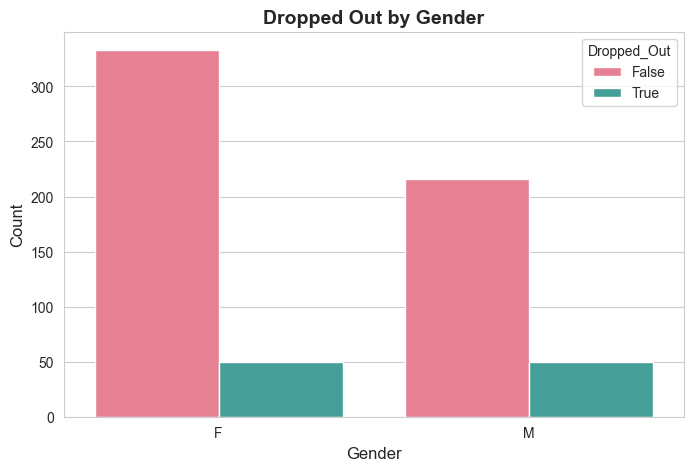

In [28]:
# Dropped Out by Gender
plt.figure(figsize=(8, 5))
sns.countplot(x='Gender', hue='Dropped_Out', data=data, palette='husl')
plt.title('Dropped Out by Gender', fontsize=14, weight='bold')
plt.xlabel('Gender', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

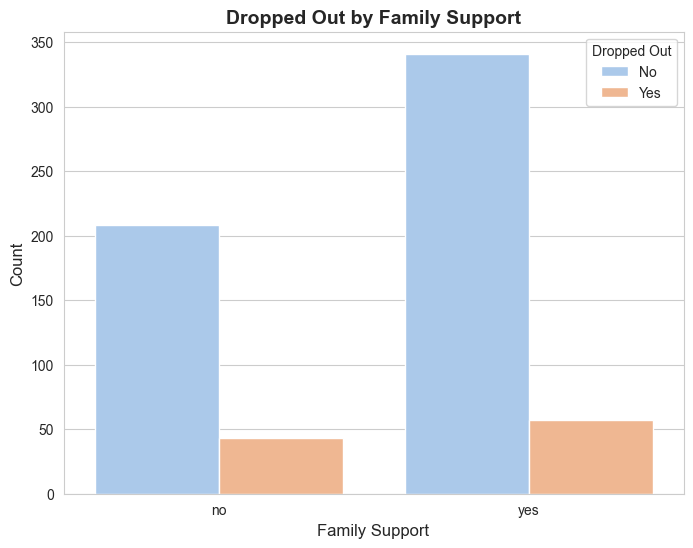

In [31]:
# Family Support vs. Dropped Out
plt.figure(figsize=(8, 6))
sns.countplot(x='Family_Support', hue='Dropped_Out', data=data, palette='pastel')
plt.title('Dropped Out by Family Support', fontsize=14, weight='bold')
plt.xlabel('Family Support', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(fontsize=10)
plt.legend(title='Dropped Out', labels=['No', 'Yes'], fontsize=10)
plt.show()



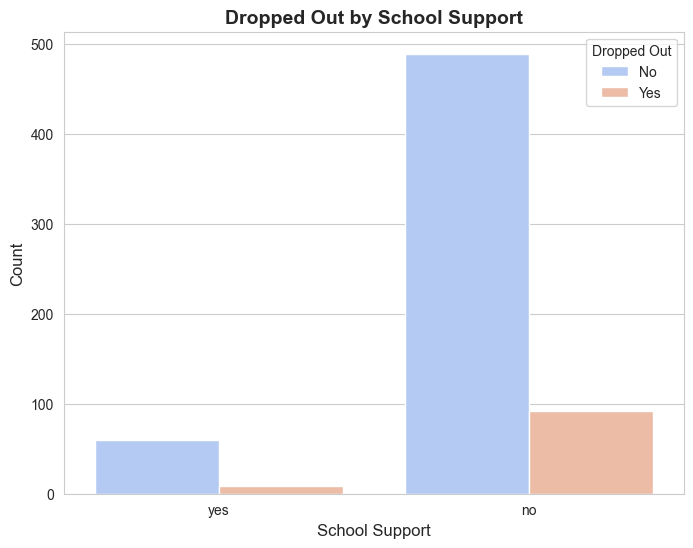

In [32]:
# School Support vs. Dropped Out
plt.figure(figsize=(8, 6))
sns.countplot(x='School_Support', hue='Dropped_Out', data=data, palette='coolwarm')
plt.title('Dropped Out by School Support', fontsize=14, weight='bold')
plt.xlabel('School Support', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(fontsize=10)
plt.legend(title='Dropped Out', labels=['No', 'Yes'], fontsize=10)
plt.show()


In [48]:
print(data['Dropped_Out'].unique())

# Convert 'Dropped_Out' to numerical values (0 for False, 1 for True)
data['Dropped_Out'] = data['Dropped_Out'].astype(int)

[False  True]


In [49]:
print(data['Dropped_Out'].unique())


[0 1]


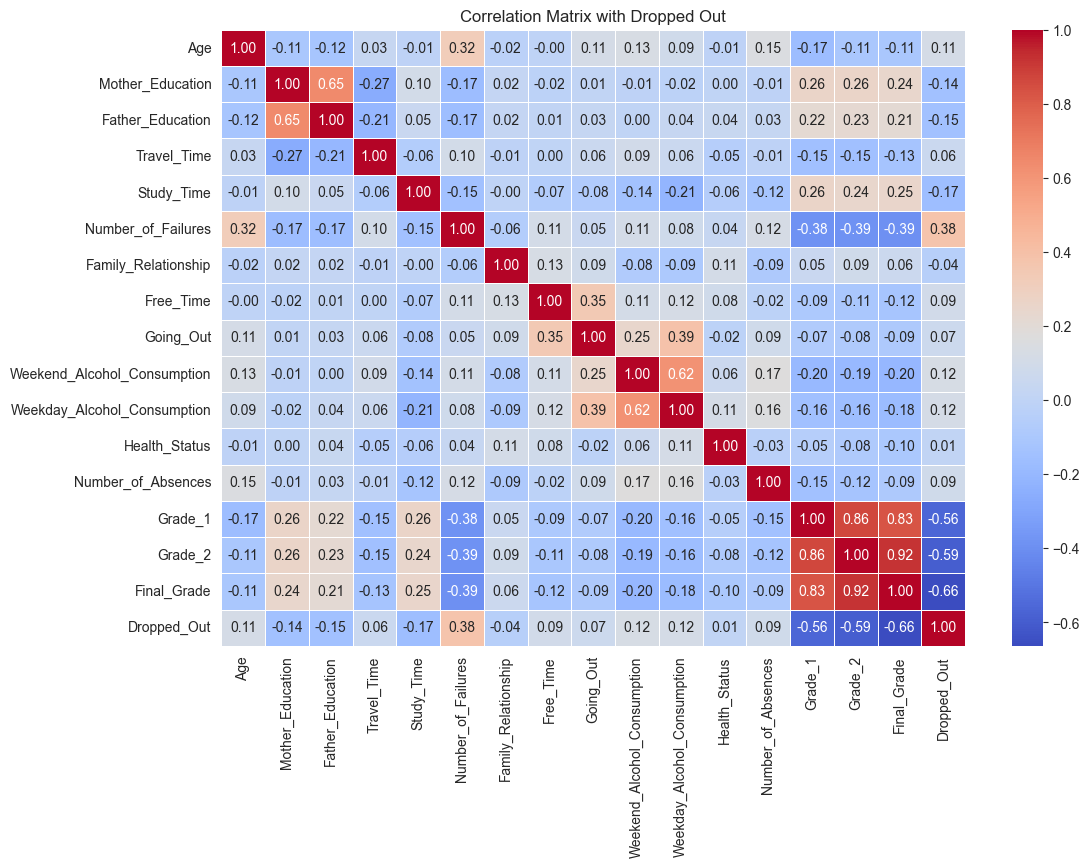

In [50]:
# Convert all other non-numeric columns to numeric if needed
data_numeric = data.select_dtypes(include=['number'])

# Calculate the correlation matrix for only numeric columns
correlation_matrix = data_numeric.corr()

# Plot the correlation map
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix with Dropped Out')
plt.show()


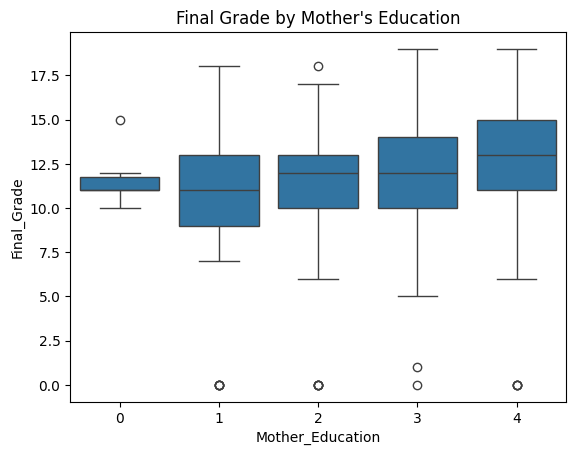

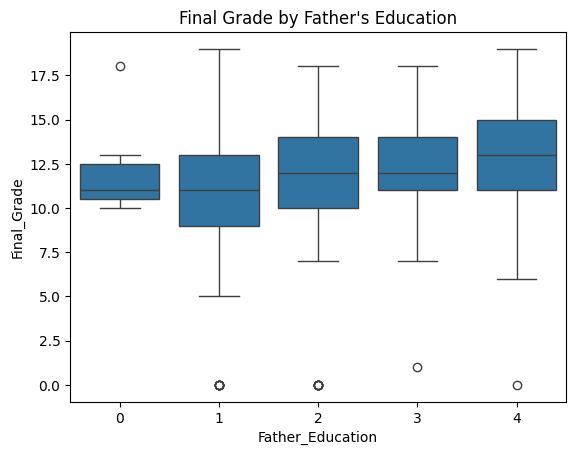

In [21]:
#Analyze how Mother_Education and Father_Education levels affect Final_Grade
sns.boxplot(x='Mother_Education', y='Final_Grade', data=data)
plt.title('Final Grade by Mother\'s Education')
plt.show()

sns.boxplot(x='Father_Education', y='Final_Grade', data=data)
plt.title('Final Grade by Father\'s Education')
plt.show()


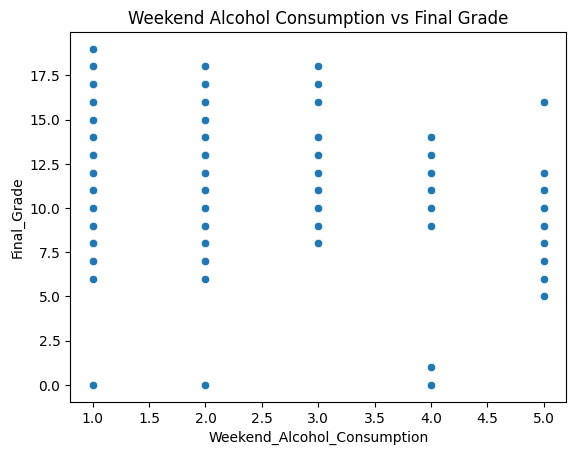

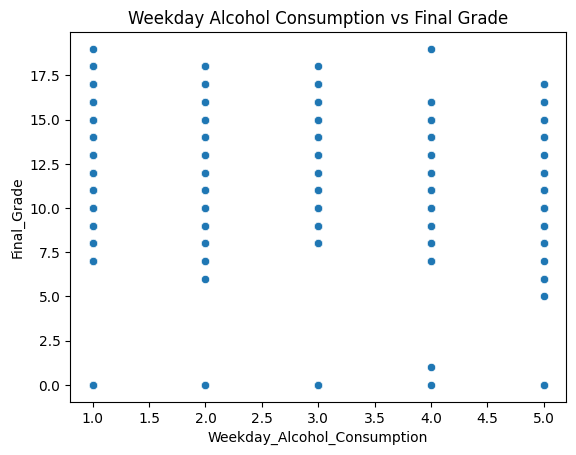

In [23]:
#Compare alcohol consumption (Weekend_Alcohol_Consumption vs. Weekday_Alcohol_Consumption) and its impact on grades 
sns.scatterplot(x='Weekend_Alcohol_Consumption', y='Final_Grade', data=data)
plt.title('Weekend Alcohol Consumption vs Final Grade')
plt.show()

sns.scatterplot(x='Weekday_Alcohol_Consumption', y='Final_Grade', data=data)
plt.title('Weekday Alcohol Consumption vs Final Grade')
plt.show()


In OUR matrix, the following columns have very low correlations (near 0) with "Dropped_Out":

Age (0.11)
Mother_Education (0.13)
Father_Education (0.09)
Travel_Time (0.12)
Study_Time (0.13)
Free_Time (-0.12)
Health_Status (0.09)
Grade_1 (-0.17)
Grade_2 (-0.18)

In [53]:
# List of columns to drop based on low correlation with "Dropped_Out"
columns_to_drop = [
    'Age', 'Mother_Education', 'Father_Education', 'Travel_Time', 
    'Study_Time', 'Free_Time', 'Health_Status', 'Grade_1', 'Grade_2','School'
]

# Drop the specified columns from the dataset
data_cleaned = data.drop(columns=columns_to_drop)

